### 9/25: Correlation

Isabella Turco  
QNC

In [26]:
import numpy as np 
import matplotlib.pyplot as plt
import math
import scipy.stats as st
from statsmodels.stats.power import NormalIndPower, TTestIndPower

#### Parametric Correlation Coefficient

In [3]:
wing_length = [10.4, 10.8, 11.1, 10.2, 10.3, 10.2, 10.7, 10.5, 10.8, 11.2, 10.6, 11.4]
tail_length = [7.4, 7.6, 7.9, 7.2, 7.4, 7.1, 7.4, 7.2, 7.8, 7.7, 7.8, 8.3]

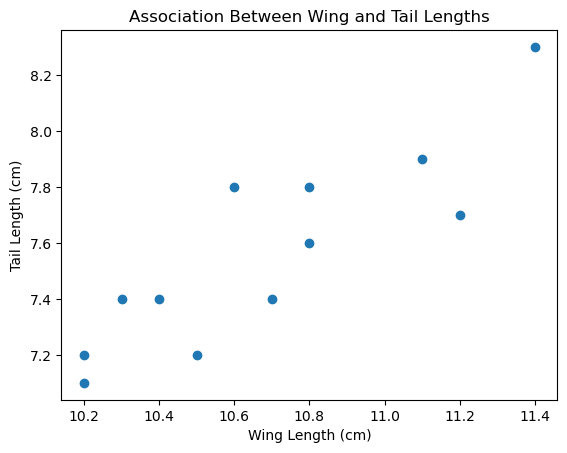

In [4]:
plt.scatter(wing_length, tail_length)
plt.xlabel("Wing Length (cm)")
plt.ylabel("Tail Length (cm)")
plt.title("Association Between Wing and Tail Lengths")
plt.show()

It seems that as wing length increases, tail length also increases.

#### Correlation Coefficient

In [5]:
# manually calculate correclation coefficient 
gns_wing, gns_tail, cov, sum_wing, sum_tail = 0, 0, 0, 0, 0

for k in range(len(wing_length)):
    gns_wing += wing_length[k]/len(wing_length)

for k in range(len(tail_length)):
    gns_tail += tail_length[k]/len(tail_length)

for k in range(len(wing_length)):
    cov += (wing_length[k]-gns_wing)*(tail_length[k]-gns_tail)/(len(wing_length))

for k in range(len(wing_length)):
    sum_wing += (wing_length[k]-gns_wing)**2

sa_wing = np.sqrt(sum_wing/len(wing_length))

for k in range(len(tail_length)):
    sum_tail += (tail_length[k]-gns_tail)**2
    
sa_tail = np.sqrt(sum_tail/len(tail_length))

corr = cov/(sa_wing*sa_tail)

print(f"Manually Calculated Correlation Coefficient: {corr}")

# use corrcoef
r_xy_np = np.corrcoef(wing_length, tail_length)[1,0]
r_yx_np = np.corrcoef(tail_length, wing_length)[1,0]
print(f"Correlation Coefficient Using numpy.corrcoef: {r_yx_np}")

Manually Calculated Correlation Coefficient: 0.8703545613058228
Correlation Coefficient Using numpy.corrcoef: 0.8703545613058227


#### Standard Error

In [6]:
r = corr
n = len(wing_length)
se = math.sqrt((1 - r**2) / (n - 2))
print(f"Standard Error of Correlation Coefficient: {se}")


Standard Error of Correlation Coefficient: 0.1557186365256737


#### Confidence Intervals

In [19]:
# fisher's z-transformation of r 
z = 0.5 * np.log((1 + r) / (1 - r))
# compute sd
s_z = math.sqrt(1 / (n - 3))
# compute confidence interval in z-space 
z_criterion = st.norm.ppf(0.975)
ci_lower_z = z - z_criterion * s_z
ci_upper_z = z + z_criterion * s_z
# convert confidence interval back to r-space 
ci_lower_r = (math.e**(2 * ci_lower_z) - 1) / (math.e**(2 * ci_lower_z) + 1)
ci_upper_r = (math.e**(2 * ci_upper_z) - 1) / (math.e**(2 * ci_upper_z) +1)
print(f"95% Confidence Interval: ({ci_lower_r},{ci_upper_r})")

95% Confidence Interval: (0.592311078084479,0.9631598602746105)


#### T-Test

In [22]:
t_stat = r * np.sqrt((n - 2) / (1 - r**2))
p_val1 = 2 * st.t.sf(np.abs(t_stat), n - 2)
print(f"Testing Against the Null Hypothesis r = 0, p = {p_val1}")
print("Yes, this value is significant.")

Testing Against the Null Hypothesis R = 0, P = 0.00023110594312057223
Yes, this value is significant.


In [25]:
r_obs = r
r_hyp = 0.75
z_obs = 0.5 * np.log((1 + r_obs) / (1 - r_obs))
z_hyp = 0.5 * np.log((1 + r_hyp) / (1 - r_hyp))

se_z = 1 / np.sqrt(n - 3)

z_stat = (z_obs - z_hyp) / se_z

p_val2 = 2 * st.norm.sf(np.abs(z_stat))

print(f"Testing Against the Null Hypothesis r = 0.75, p = {p_val2}")
print("No, this value is not significant.")


Testing Against the Null Hypothesis r = 0.75, p = 0.2780303018608823
No, this value is not significant.


#### Statistical Power and Sample Size

In [44]:
r_threshold = 0.5
alpha = 0.05 
power = np.arange(0,1.1,0.1)

z_threshold = 0.5 * np.log((1 + r_threshold) / (1 - r_threshold))

power_analysis = NormalIndPower()
power_values, sample_sizes = [], []
for power_val in power:
    sample_size = power_analysis.solve_power(effect_size = z_threshold,alpha = alpha, power = power_val, alternative = 'two-sided')
    sample_sizes.append(sample_size)
    observed_power = power_analysis.power(effect_size = z_threshold, nobs1 = sample_size, alpha = alpha, alternative='two-sided')
    power_values.append(observed_power)

for s,p in zip(sample_sizes, power_values):
    print(f"Sample Size: {s}")
    print(f"Power: {p}")

Sample Size: [10.]
Power: [0.23289822]
Sample Size: 2.8208055887332946
Power: 0.0999999790325032
Sample Size: 8.234114180058997
Power: 0.20000000000018672
Sample Size: 13.641036893988533
Power: 0.3000000032046303
Sample Size: 19.297942983258928
Power: 0.40000000000886343
Sample Size: 25.459392862487867
Power: 0.49999999997104416
Sample Size: 32.46913724858134
Power: 0.5999999999690621
Sample Size: 40.909792572728584
Power: 0.6999999999992856
Sample Size: 52.02447339995515
Power: 0.8000000002016563
Sample Size: 69.6461559368317
Power: 0.900000000862949
Sample Size: 5000.0
Power: 1.0


/Users/iturco/anaconda3/lib/python3.11/site-packages/statsmodels/stats/power.py:525: ConvergenceWarning: 
Failed to converge on a solution.

  warnings.warn(convergence_doc, ConvergenceWarning)
